In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

filename = 'data/data.csv'
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data = pd.read_csv(filename, usecols=cols, on_bad_lines='skip')

data.dropna(inplace=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [18]:
results = {}

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

classes = np.unique(y)
print(f'Уникальных значений y - {len(classes)}')

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def get_stats(y_test, y_pred, model, X_test):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'ROC-AUC': np.nan
    }

    y_bin = label_binarize(y_test, classes=classes)
    y_score = model.predict_proba(X_test)
    metrics['ROC-AUC'] = roc_auc_score(y_bin, y_score, average='weighted', multi_class='ovo')

    print(f'accuracy = {metrics['Accuracy']}')
    print(f'precision = {metrics['Precision']}')
    print(f'recall = {metrics['Recall']}')
    print(f'f1 = {metrics['F1-Score']}')
    print(f'roc_auc = {metrics['ROC-AUC']}')

    return metrics

Уникальных значений y - 6


In [19]:
print("GaussianNB")
model = GaussianNB()
model.fit(X_train_def, y_train_def)
y_pred = model.predict(X_test_def)
results['GaussianNB'] = get_stats(y_test_def, y_pred, model, X_test_def)

GaussianNB
accuracy = 0.5851528384279476
precision = 0.6108889967114131
recall = 0.5851528384279476
f1 = 0.5940315636828915
roc_auc = 0.7630749640388964


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree")
results['Decision Tree'] = get_stats(y_test, y_pred_tree, tree, X_test)

Decision Tree
accuracy = 0.6331877729257642
precision = 0.6224029897054232
recall = 0.6331877729257642
f1 = 0.6267769686267789
roc_auc = 0.7120495502386889


In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("Linear Discriminant Analysis")
results['Linear Discriminant Analysis'] = get_stats(y_test, y_pred_lda, lda, X_test)

Linear Discriminant Analysis
accuracy = 0.6157205240174672
precision = 0.5994989362893293
recall = 0.6157205240174672
f1 = 0.6060613960763868
roc_auc = 0.7835892557623311


In [23]:
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
results['Support Vector Machine'] = get_stats(y_test, y_pred_svm, svm, X_test)

Support Vector Machine
accuracy = 0.6637554585152838
precision = 0.6323648179569832
recall = 0.6637554585152838
f1 = 0.638181887458663
roc_auc = 0.8190301035495674


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-Nearest Neighbor")
results['k-Nearest Neighbor'] = get_stats(y_test, y_pred_knn, knn, X_test)

k-Nearest Neighbor
accuracy = 0.5676855895196506
precision = 0.5452857652907088
recall = 0.5676855895196506
f1 = 0.5550775152784339
roc_auc = 0.7230565245684292


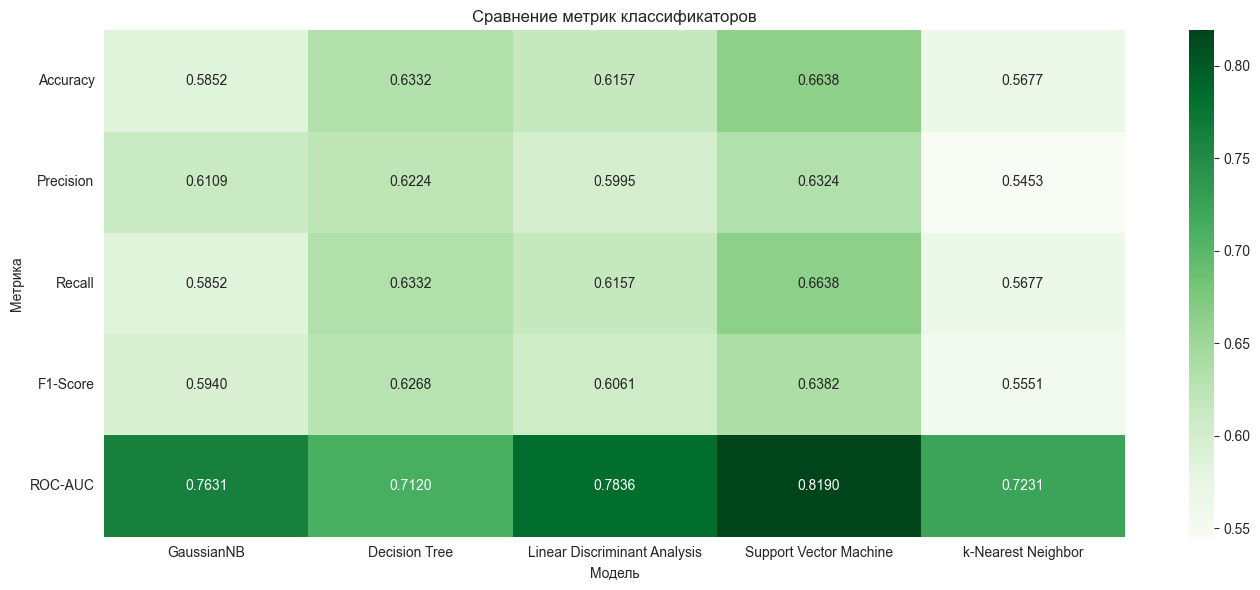

In [25]:
df_results = pd.DataFrame(results).T

plt.figure(figsize=(14, 6))
sns.heatmap(df_results.T, annot=True, cmap="Greens", fmt=".4f")
plt.title("Сравнение метрик классификаторов")
plt.ylabel("Метрика")
plt.xlabel("Модель")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

pipe_gnb = Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])
grid_gnb = {
    'clf__var_smoothing': np.logspace(-12, -6, 7)
}

pipe_tree = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])
grid_tree = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

pipe_lda = Pipeline([('scaler', StandardScaler()), ('clf', LinearDiscriminantAnalysis())])
grid_lda = {
    'clf__solver': ['svd', 'lsqr', 'eigen'],
    'clf__shrinkage': [None, 'auto', 0.0, 0.1, 0.5]
}

pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True, random_state=42))])
grid_svm = {
    'clf__C': loguniform(1e-3, 1e3),
    'clf__kernel': ['rbf', 'poly', 'linear'],
    'clf__gamma': ['scale', 'auto'],
    'clf__degree': [2, 3, 4]
}

pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
grid_knn = {
    'clf__n_neighbors': [3, 5, 7, 9, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]
}

models_and_grids = {
    'GaussianNB': (pipe_gnb, grid_gnb, GridSearchCV),
    'DecisionTree': (pipe_tree, grid_tree, GridSearchCV),
    'LDA': (pipe_lda, grid_lda, GridSearchCV),
    'SVM': (pipe_svm, grid_svm, RandomizedSearchCV),
    'kNN': (pipe_knn, grid_knn, GridSearchCV)
}

def run_search(name, pipeline, param_grid, searcher, X, y):
    print(f'{name}')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    if searcher is GridSearchCV:
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='f1_weighted',
            cv=cv,
            n_jobs=-1,
            refit=True,
            verbose=0
        )
    else:
        search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grid,
            n_iter=40,
            scoring='f1_weighted',
            cv=cv,
            n_jobs=-1,
            refit=True,
            random_state=42,
            verbose=0
        )

    search.fit(X, y)
    print('Best score:', search.best_score_)
    print('Best params:', search.best_params_, '\n')
    results = pd.DataFrame(search.cv_results_)
    return search, results

all_searches = {}
all_results = {}

for name, (pipe, grid, searcher) in models_and_grids.items():
    try:
        search_obj, cv_results = run_search(name, pipe, grid, searcher, X_train, y_train)
        all_searches[name] = search_obj
        all_results[name] = cv_results
    except Exception as e:
        print(f'Ошибка при обработке {name}: {e}')


GaussianNB
Best score: 0.5371867487016119
Best params: {'clf__var_smoothing': np.float64(1e-12)} 

DecisionTree
Best score: 0.578878585982864
Best params: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} 

LDA
Best score: 0.5813968111639645
Best params: {'clf__shrinkage': 0.1, 'clf__solver': 'lsqr'} 

SVM
Best score: 0.5931830862737267
Best params: {'clf__C': np.float64(4.0428727350273315), 'clf__degree': 4, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'} 

kNN
Best score: 0.606463475272152
Best params: {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__weights': 'distance'} 



## Влияние гиперпараметров

### GaussianNB
Default f1 = 0.594 -> GridSearch = 0.537, Значение 1e-12 слишком маленькое — модель становится слишком чувствительной к дисперсии данных.

### DecisionTree
Default f1 = 0.627 -> GridSearch = 0.579, Значения фактически дефолтные, так что GridSearch ничего не улучшил - либо GridSearch перебирал слишком узкий диапазон, либо кросс-валидация могла случайно разделить данные неудачно

### LDA
Default f1 = 0.606 -> GridSearch = 0.581, LDA с lsqr и shrinkage иногда работает хуже, если признаки уже масштабированы или классы не сбалансированы

### SVM
Default f1 = 0.638 -> GridSearch = 0.593, gamma='auto' вычисляется как 1 / n_features, что часто слишком большое значение, приводящее к переобучению, degree=4 не используется для rbf, но наличие этого параметра в сетке может сбить GridSearch, C=4 — довольно высокое, может сделать границу слишком гибкой

### kNN
Default f1 = 0.555 -> GridSearch = 0.606, n_neighbors=5 (изначальное) могло быть слишком маленьким - появлялся шум, p=1 может лучше работать на данных с разными масштабами, weights='distance' помогает дать больший вес ближайшим точкам и уменьшает ошибку



In [26]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



In [27]:
tf.random.set_seed(42)

n_features = X_train.shape[1]
n_classes = len(np.unique(y))

model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax' if n_classes > 2 else 'sigmoid')
])

if n_classes > 2:
    loss_fn = "sparse_categorical_crossentropy"
    metrics = ["accuracy"]
else:
    loss_fn = "binary_crossentropy"
    metrics = ["accuracy", keras.metrics.AUC(name="AUC")]

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss_fn,
    metrics=metrics
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

y_pred_proba = model.predict(X_test)
if n_classes > 2:
    y_pred = np.argmax(y_pred_proba, axis=1)
else:
    y_pred = (y_pred_proba > 0.5).astype(int).ravel()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
roc = roc_auc_score(y_test, y_pred_proba if n_classes == 2 else pd.get_dummies(y_test), multi_class='ovr')

print("Метрики нейронной сети")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("\nОтчёт классификации:")
print(classification_report(y_test, y_pred, zero_division=0))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3776 - loss: 1.6226 - val_accuracy: 0.5027 - val_loss: 1.4289
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4706 - loss: 1.3768 - val_accuracy: 0.5464 - val_loss: 1.2352
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5212 - loss: 1.2349 - val_accuracy: 0.5574 - val_loss: 1.1411
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5335 - loss: 1.1795 - val_accuracy: 0.5464 - val_loss: 1.0954
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5404 - loss: 1.0928 - val_accuracy: 0.5410 - val_loss: 1.0725
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5554 - loss: 1.0870 - val_accuracy: 0.5464 - val_loss: 1.0536
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5622 - loss: 1.0444 - val_accuracy: 0.5574 - val_loss: 1.0429
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5527 - loss: 1.0504 - val_accuracy: 0.5574 - val_loss

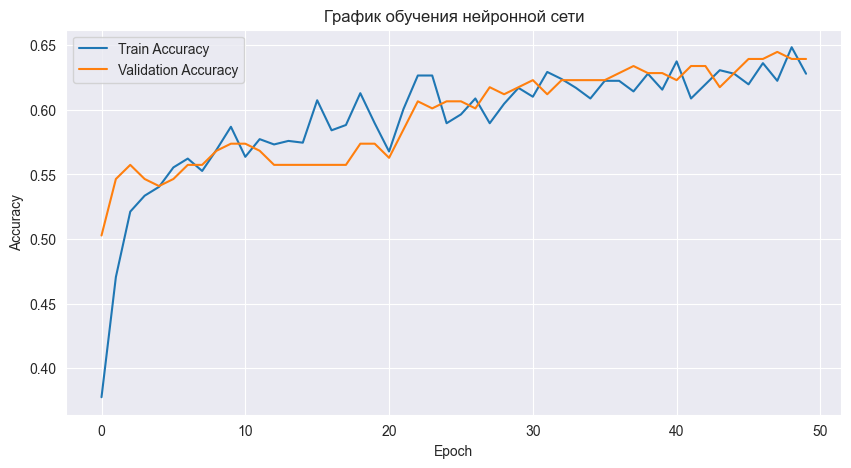

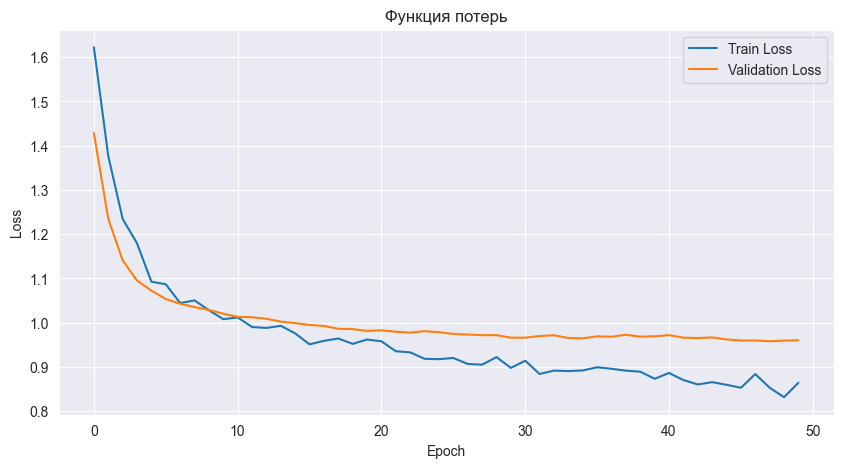

In [30]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('График обучения нейронной сети')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Функция потерь')
plt.legend()
plt.show()

In [31]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(n_features,)))

    # количество слоёв и нейронов
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Choice(f'units_{i}', [32, 64, 128]),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(n_classes, activation='softmax' if n_classes > 2 else 'sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy' if n_classes > 2 else 'binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_dir',
    project_name='nn_tuning'
)

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)
best_model = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("Лучшие гиперпараметры:")
for param in best_hps.values.keys():
    print(param, ":", best_hps.get(param))

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.6284152865409851

Best val_accuracy So Far: 0.6557376980781555
Total elapsed time: 00h 01m 07s
Лучшие гиперпараметры:
num_layers : 3
units_0 : 64
dropout_0 : 0.4
lr : 0.01
units_1 : 32
dropout_1 : 0.1
units_2 : 32
dropout_2 : 0.1


C:\Users\Hierarchy\PycharmProjects\labs\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Оптимальные параметры

### Слои
В результате подбора параметров увеличилось количество слоев (2 -> 3). Модель стала более глубокая, то есть способна захватывать более сложные зависимости в данных.

### Нейроны
Оставлен первый слой с 64 нейронами (оптимально — баланс между вычислительной мощностью и обобщающей способностью).

Второй и третий — по 32 нейрона.
Это создаёт сужающуюся архитектуру (“bottleneck”), что помогает модели обобщать и избегать запоминания данных.

### Dropout
Было 0.3 и 0.2 -> стало 0.4 / 0.1 / 0.1.

На первом слое — усиленное регуляризующее воздействие (0.4), на последующих — мягкое подавление переобучения (0.1).

Это говорит о том, что переобучение происходило в первых слоях, и более сильный dropout помог его снизить, сохранив обучаемость на глубоких слоях.

### Learning rate

Увеличение learning rate (c 0.001 до 0.01) означает, что оптимизатор делает более крупные шаги по поверхности потерь. Таким образом, модель за 50 эпох могла не успеть достигнуть оптимального состояния.